# Importing Libraries

In [1]:
import re

import matplotlib.pyplot as plt
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
df = pd.read_excel("Data Analyst(Test Data).xlsx")
df.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor


# Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Review    6393 non-null   object        
 1   date      6448 non-null   datetime64[ns]
 2   Location  1711 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 151.3+ KB


In [4]:
df.isna().sum()

Review        55
date           0
Location    4737
dtype: int64

In [5]:
df.shape

(6448, 3)

In [6]:
df = df.dropna(subset=["Review"])  # Removing row with no review given
df.shape

(6393, 3)

In [7]:
df = df.fillna("Unknown")
df.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,The hotel was adequate for my stay. The strips...,2019-08-20,Unknown
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor


# EDA

# Date range of data

In [8]:
print(f"From {df.date.min()} to {df.date.max()}")

From 2018-08-01 00:00:00 to 2019-08-20 00:00:00


# Date Range during which highest reviews are recieved on

In [9]:
df.date.value_counts()[:10]

date
2019-06-01    150
2019-05-01    136
2019-07-01    103
2019-03-01     99
2018-10-01     91
2019-02-01     90
2018-09-01     84
2018-11-01     73
2018-12-01     68
2018-08-01     64
Name: count, dtype: int64

# year wise reviews are recieved on

In [10]:
df.date.dt.year.value_counts()

date
2019    3821
2018    2572
Name: count, dtype: int64

# Months in which highest reviews are recieved on

In [11]:
df[df.date.dt.year == 2018].date.dt.month.value_counts()

date
12    626
10    520
11    515
9     478
8     433
Name: count, dtype: int64

In [12]:
df[df.date.dt.year == 2019].date.dt.month.value_counts()

date
3    603
4    583
7    547
5    521
1    504
2    412
6    362
8    289
Name: count, dtype: int64

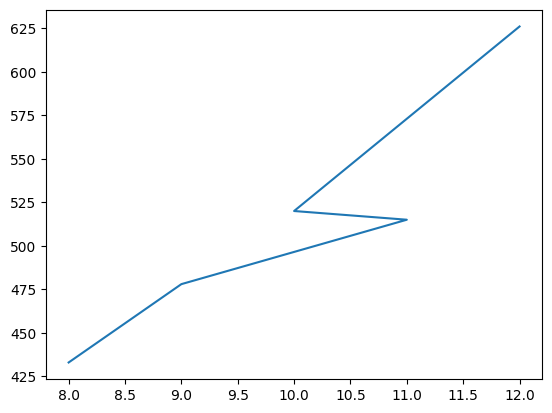

In [13]:
plt.plot(df[df.date.dt.year == 2018].date.dt.month.value_counts());

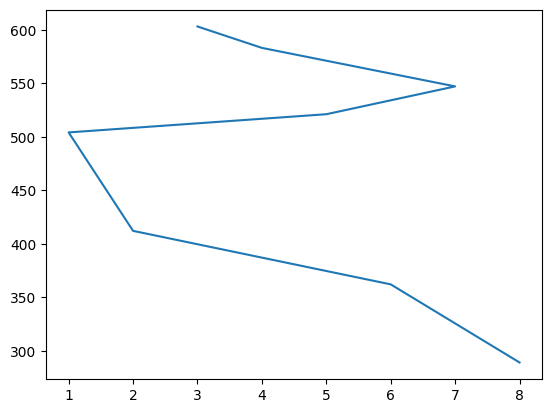

In [14]:
plt.plot(df[df.date.dt.year == 2019].date.dt.month.value_counts());

# Top Locations from which reviews are recieved

In [15]:
df["Location"].value_counts()[:10]

Location
Unknown                     4688
United States of America     116
New York                      34
California                    19
San Jose                      19
Canada                        16
Florida                       16
United Kingdom                14
New York, NY                  13
Toronto                       12
Name: count, dtype: int64

# Total countries including Unknown as one

In [16]:
len(list(df.Location.unique()))

1079

#  Removing stop words from the reviews

In [17]:
# nltk.download("stopwords")
STOPWORDS = stopwords.words("english")


def clean_text_nltk(text):
    text = text.lower()
    text = re.sub(r"[^0-9a-zA-Z]", " ", text)
    text = re.sub(r"\s+", " ", text)
    filtered_tokens = " ".join(word for word in text.split() if word not in STOPWORDS)
    return filtered_tokens

In [18]:
df.loc[:, "Review"] = df.Review.apply(clean_text_nltk)
df.head()

,Review,date,Location
0,impressed resort great staff main resort pool ...,2019-08-20,Sebastian
1,rooms nice outside needs work also free breakf...,2019-08-20,Los Angeles
2,great location stayed hotel last three trips n...,2019-08-20,Georgia
3,hotel adequate stay strips bathtub useless fel...,2019-08-20,Unknown
4,great location room large spacious parking eas...,2019-08-19,Palm Harbor


In [19]:
df.iloc[0]["Review"]

'impressed resort great staff main resort pool bar blast clean professional staff great location reasonable read read less'

In [20]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(df.iloc[0]["Review"])["compound"]

0.9325

### Using Compound :
compound: This is a composite score that is calculated using a formula that normalizes the scores. It ranges from -1.0 to 1.0, where -1.0 
means extremely negative, 1.0 means extremely positive, and 0.0 means neutral. In this case, the compound score is 0.9325, which indicates a very positive sentiment.

Here storing Positive, Neutral and Negative into separate column based on score calculated from reviews

In [21]:
def sentiment_score(text):
    score = sia.polarity_scores(text)["compound"]
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"


df["category"] = df.Review.apply(sentiment_score)
df.head()

,Review,date,Location,category
0,impressed resort great staff main resort pool ...,2019-08-20,Sebastian,Positive
1,rooms nice outside needs work also free breakf...,2019-08-20,Los Angeles,Positive
2,great location stayed hotel last three trips n...,2019-08-20,Georgia,Positive
3,hotel adequate stay strips bathtub useless fel...,2019-08-20,Unknown,Positive
4,great location room large spacious parking eas...,2019-08-19,Palm Harbor,Positive


# Positive, Neutral and Negative distribution in the data

In [22]:
df.category.value_counts()

category
Positive    4758
Negative     916
Neutral      719
Name: count, dtype: int64

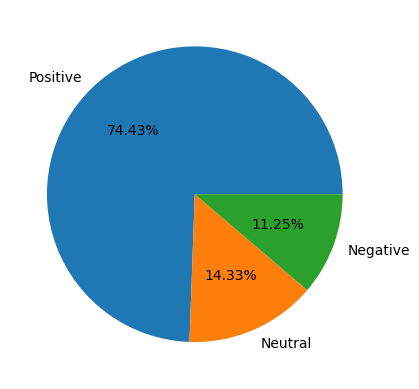

In [23]:
plt.pie(df.category.value_counts(), labels=df.category.unique(), autopct="%.2f%%");

# Location with highest positive reviews

In [24]:
df[df.category == "Positive"].groupby(["Location", "category"]).size().sort_values(
    ascending=False
)[:20]

Location                  category
Unknown                   Positive    3474
United States of America  Positive      78
New York                  Positive      26
San Jose                  Positive      17
California                Positive      16
Canada                    Positive      11
Toronto                   Positive      10
United Kingdom            Positive      10
Los Angeles               Positive       9
San Diego                 Positive       9
Miami                     Positive       9
Chicago                   Positive       9
Boston                    Positive       8
Orlando                   Positive       8
Florida                   Positive       8
New York, NY              Positive       8
Philadelphia              Positive       8
Seattle                   Positive       8
NYC                       Positive       7
London                    Positive       7
dtype: int64

# Location with highest negative reviews

In [25]:
df[df.category == "Negative"].groupby(["Location", "category"]).size().sort_values(
    ascending=False
)[:20]

Location                  category
Unknown                   Negative    681
United States of America  Negative     14
New York                  Negative      5
Florida                   Negative      5
NY                        Negative      4
Seattle                   Negative      3
Orlando                   Negative      3
Canada                    Negative      3
Chicago                   Negative      2
San Diego                 Negative      2
Stuttgart                 Negative      2
Miami                     Negative      2
US                        Negative      2
United Kingdom            Negative      2
Montreal                  Negative      2
LA                        Negative      2
Atlanta, GA               Negative      2
New York, NY              Negative      2
California                Negative      2
NYC                       Negative      2
dtype: int64

# Location with highest neutral reviews

In [26]:
df[df.category == "Neutral"].groupby(["Location", "category"]).size().sort_values(
    ascending=False
)[:20]

Location                  category
Unknown                   Neutral     533
United States of America  Neutral      24
Puerto Rico               Neutral       5
New York, NY              Neutral       3
New York                  Neutral       3
Florida                   Neutral       3
España                    Neutral       2
saitama, jp               Neutral       2
ny                        Neutral       2
mexico                    Neutral       2
United Kingdom            Neutral       2
Santo Domingo             Neutral       2
Québec                    Neutral       2
Montréal                  Neutral       2
Kuwait                    Neutral       2
Guadalajara               Neutral       2
東京                        Neutral       2
Canada                    Neutral       2
Cannes                    Neutral       1
San Jose, California      Neutral       1
dtype: int64

In [27]:
pos_1 = df[(df.category == "Positive") & (df.date.dt.year == 2018)]["Review"].count()
pos_1

1909

In [28]:
neg_1 = df[(df.category == "Negative") & (df.date.dt.year == 2018)]["Review"].count()
neg_1

363

In [29]:
pos_2 = df[(df.category == "Positive") & (df.date.dt.year == 2019)]["Review"].count()
pos_2

2849

In [30]:
neg_2 = df[(df.category == "Negative") & (df.date.dt.year == 2019)]["Review"].count()
neg_2

553

In [31]:
total_2019 = df[df.date.dt.year == 2019]["date"].count()
total_2018 = df[df.date.dt.year == 2018]["date"].count()

In [32]:
print(
    f"Total Positive Reviews in 2018 and 2019 are {pos_1} of {total_2018} and {pos_2} of {total_2019} with Negative of {total_2018-pos_1} and {total_2019-pos_2}"
)

Total Positive Reviews in 2018 and 2019 are 1909 of 2572 and 2849 of 3821 with Negative of 663 and 972


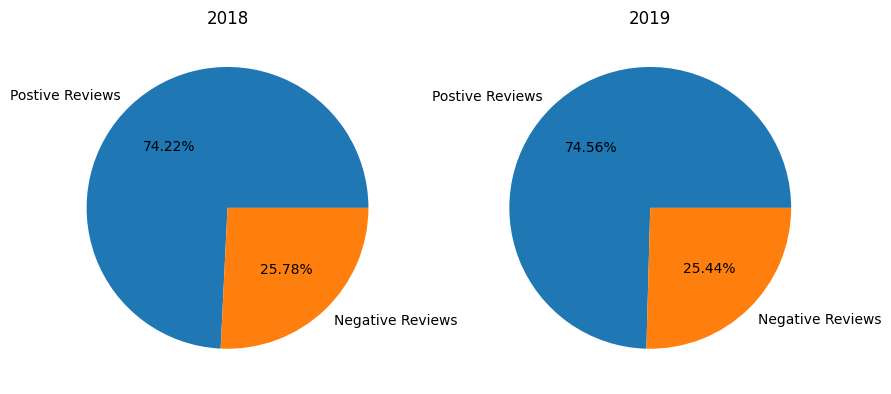

In [33]:
fig, ax = plt.subplots(ncols=2)

fig.set(size_inches=(10,6))

ax[0].pie(
    [pos_1, total_2018 - pos_1],
    labels=["Postive Reviews", "Negative Reviews"],
    autopct="%.2f%%",
)
ax[0].set_title('2018')

ax[1].pie(
    [pos_2, total_2019 - pos_2],
    labels=["Postive Reviews", "Negative Reviews"],
    autopct="%.2f%%",
)
ax[1].set_title('2019');